In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Resources/Papers

https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3884-2019.pdf

https://www.amazon.com/Python-SAS-Users-SAS-Oriented-Introduction/dp/1484250001

## Access Data

think proc import or data infile

In [234]:
df = pd.read_csv("cars.csv")
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


## Basic Exploration

Data types, think proc contents

Maybe focus on showing proc contents with labels, formats, etc. Pretty cool procedure to see everything at once. Not sure if there is something similar with python.

Also see how MSRP is an object (text). Fix that later.

In [129]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

Look for all column names. Returns an index.

In [130]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [131]:
type(df.columns)

pandas.core.indexes.base.Index

In [17]:
for i in df.columns:
    print(i)

Make
Model
Type
Origin
DriveTrain
MSRP
Invoice
EngineSize
Cylinders
Horsepower
MPG_City
MPG_Highway
Weight
Wheelbase
Length


Think proc means

In [132]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


You can also transpose it for a different look.

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EngineSize,428.0,3.196729,1.108595,1.3,2.375,3.0,3.90,8.3
Cylinders,426.0,5.807512,1.558443,3.0,4.000,6.0,6.00,12.0
Horsepower,428.0,215.885514,71.836032,73.0,165.000,210.0,255.00,500.0
MPG_City,428.0,20.060748,5.238218,10.0,17.000,19.0,21.25,60.0
MPG_Highway,428.0,26.843458,5.741201,12.0,24.000,26.0,29.00,66.0
Weight,428.0,3577.953271,758.983215,1850.0,3104.000,3474.5,3977.75,7190.0
Wheelbase,428.0,108.154206,8.311813,89.0,103.000,107.0,112.00,144.0
Length,428.0,186.362150,14.357991,143.0,178.000,187.0,194.00,238.0


Proc freq

In [134]:
df.Make.value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Volvo            12
Jaguar           12
Pontiac          11
Kia              11
Lexus            11
Subaru           11
Mazda            11
Mercury           9
Lincoln           9
Buick             9
Cadillac          8
Suzuki            8
Saturn            8
GMC               8
Infiniti          8
Acura             7
Porsche           7
Saab              7
Oldsmobile        3
Land Rover        3
Jeep              3
Isuzu             2
Scion             2
MINI              2
Hummer            1
Name: Make, dtype: int64

Plot value counts quickly. Proc freq with plots= option.

<AxesSubplot:>

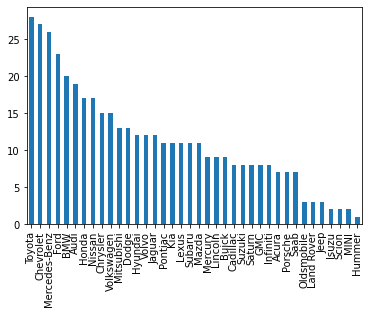

In [135]:
df.Make.value_counts().plot(kind='bar')

Loop over value counts, similar to freq with table statement

In [136]:
cols=["Origin", "Type", "Cylinders"]
for i in cols:
    print(df[i].value_counts())
    print("\n")

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64


Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64


6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
10.0      2
3.0       1
Name: Cylinders, dtype: int64




Create a DF from value counts. Similar to out= in proc freq.

First example shows new output. With to_frame the series turns into a dataFrame.

In [137]:
df.Make.value_counts().to_frame()

,Make
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Chrysler,15
Volkswagen,15


Assignment statement for same code as above.

In [34]:
dfMakes = df.Make.value_counts().to_frame()

In [35]:
dfMakes.head()

,Make
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20


plot bar using index as category.

<AxesSubplot:>

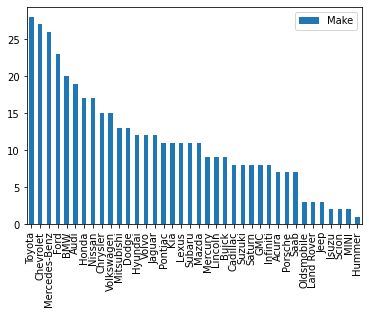

In [36]:
dfMakes.plot(kind="bar")

## Data Prep

Look at the raw data

In [138]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


### Mimic data step using .assign

I'd also show how many programmers might create a column one at a time.
I find the data step cleaner.

**Create an if then function to apply to the data**

In [119]:
def mpg_category(mpg):
    if mpg < 20:
        return "low mileage"
    else:
        return "high mileage"   

You need to use lambda to reference the current dataframe being created. Otherwise, it'll use the df dataframe.

In [243]:
dfNew = df.rename(columns={"DriveTrain":"Drive_Train", "MPG_City":"MPGCity", "MPG_Highway":"MPGHighway"}) \
          .assign(NewString="test",   ## assignment statement
                  NewNumber=10,       ## assignment statement
                  MeanFunction=lambda x: x[["MPGCity", "MPGHighway"]].mean(axis=1),
                  IF_THEN=lambda x: x.MPGCity.apply(mpg_category),
                  StringFunctionUpper=lambda x: x.Origin.str.upper(),
                  MSRP = lambda x: x.MSRP.str.replace('[\$,]', '', regex=True).astype(float)) ## character to number \
          .drop(columns=["Model","Cylinders", "Horsepower", "Weight", "EngineSize", "Wheelbase","Length"])

In [244]:
dfNew.head()

,Make,Type,Origin,Drive_Train,MSRP,Invoice,MPGCity,MPGHighway,NewString,NewNumber,MeanFunction,IF_THEN,StringFunctionUpper
0,Acura,SUV,Asia,All,36945.0,"$33,337",17,23,test,10,20.0,low mileage,ASIA
1,Acura,Sedan,Asia,Front,23820.0,"$21,761",24,31,test,10,27.5,high mileage,ASIA
2,Acura,Sedan,Asia,Front,26990.0,"$24,647",22,29,test,10,25.5,high mileage,ASIA
3,Acura,Sedan,Asia,Front,33195.0,"$30,299",20,28,test,10,24.0,high mileage,ASIA
4,Acura,Sedan,Asia,Front,43755.0,"$39,014",18,24,test,10,21.0,low mileage,ASIA


In [247]:
dfNew.dtypes

Make                    object
Type                    object
Origin                  object
Drive_Train             object
MSRP                   float64
Invoice                 object
MPGCity                  int64
MPGHighway               int64
NewString               object
NewNumber                int64
MeanFunction           float64
IF_THEN                 object
StringFunctionUpper     object
dtype: object

In [240]:
df.MSRP.str.replace('[\$,]', '', regex=True).astype(float)

0      36945.0
1      23820.0
2      26990.0
3      33195.0
4      43755.0
        ...   
423    40565.0
424    42565.0
425    45210.0
426    26135.0
427    35145.0
Name: MSRP, Length: 428, dtype: float64

In [168]:
dfNew.head()

,Make,Type,Origin,Drive_Train,Invoice,MPGCity,MPGHighway,NewString,NewNumber,MeanFunction,IF_THEN,StringFunctionUpper
0,Acura,SUV,Asia,All,"$33,337",17,23,test,10,20.0,low mileage,ASIA
1,Acura,Sedan,Asia,Front,"$21,761",24,31,test,10,27.5,high mileage,ASIA
2,Acura,Sedan,Asia,Front,"$24,647",22,29,test,10,25.5,high mileage,ASIA
3,Acura,Sedan,Asia,Front,"$30,299",20,28,test,10,24.0,high mileage,ASIA
4,Acura,Sedan,Asia,Front,"$39,014",18,24,test,10,21.0,low mileage,ASIA


## Analysis 

Similar to proc corr

In [156]:
dfNew[["MPGCity", "MPGHighway", "MPGAvg"]].corr()

,MPGCity,MPGHighway,MPGAvg
MPGCity,1.000000,0.941021,0.983742
MPGHighway,0.941021,1.000000,0.986485
MPGAvg,0.983742,0.986485,1.000000


Maybe show proc univariate? Not sure if there is somethign similar in Python

## Visualization (basics)

I'd change the style template for sas visuals. The default is pretty bad. You can steal my custom style template from the Data Vis with ODS Graphics course, lesson 3. 

PROC SGPLOT bar

Text(0.5, 1.0, 'Origin of Cars')

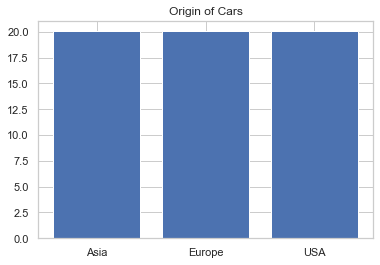

In [219]:
plt.bar(df.Origin, df.MPG_City.mean())
plt.title("Origin of Cars")

Can also use seaborn

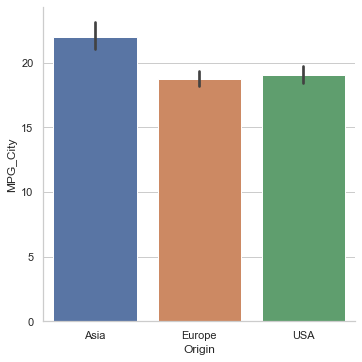

In [220]:
sns.catplot(data=df, kind="bar", x="Origin", y="MPG_City")

PROC SGPLOT, scatter

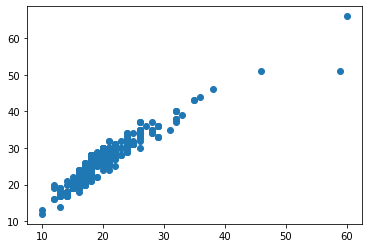

In [171]:
plt.scatter(df.MPG_City, df.MPG_Highway)

PROC SGPLOT Histogram

(array([ 31., 195., 142.,  44.,   9.,   4.,   0.,   1.,   0.,   2.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 10 artists>)

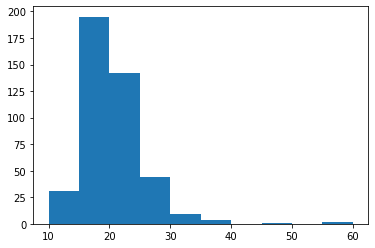

In [172]:
plt.hist(df.MPG_City)

PROC SGSCATTER (multi-cell graph)

Error in seaborn package. Not sure which version. Her is the github issue for pairplot: https://github.com/mwaskom/seaborn/issues/2260

Notice first cell does not show.

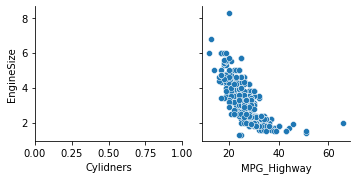

In [190]:
sns.pairplot(df,x_vars=["Cylidners", "MPG_Highway"], y_vars="EngineSize")

Correct version, add diag_kind=None

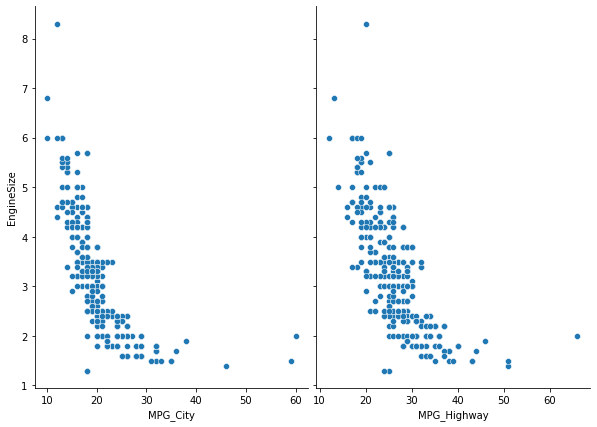

In [197]:
sns.pairplot(df,x_vars=["MPG_City", "MPG_Highway"], y_vars="EngineSize", 
             diag_kind=None, height=6, aspect=.7)

## Exporting

I'd show ODS to PDF with layout. Not sure how to do it with Python and don't have the time. I'd love to learn though! I love how ODS works with this. I think it's great to show.